# Preprocessing the Data (Version 2)


In [7]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd 

# Import and read the charity_data.csv.
rawDF = pd.read_csv('ML Data\MLdataB2.csv')
rawDF.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ML Data\\MLdataB1.csv'

In [8]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16032 entries, 0 to 16031
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        16032 non-null  object 
 1   brand        16032 non-null  object 
 2   spend        16032 non-null  float64
 3   impressions  16032 non-null  int64  
 4   leads        16032 non-null  int64  
 5   link_clicks  16032 non-null  int64  
 6   reach        16032 non-null  int64  
 7   agency       16032 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1002.1+ KB


# Rough/Quick Preprocessing Complete

# Binning

In [10]:
# Determine the number of unique values in each column.
# if anything > 10, suggested to inspect further if non-numeric/string value column
rawDF.nunique()
# output shows potential need for binning on: 
# location_name, agency, date_start, campaign_id, state

state             1
brand             1
spend          5359
impressions    3607
leads            25
link_clicks     109
reach          3427
agency            6
dtype: int64

In [13]:
# Look at agency value counts for binning
agencyCnts = rawDF['agency'].value_counts()
agencyCnts

# It may be appropriate to EITHER: 
# 1. Bin Agencies 10-12 as "Other"
# OR 2. Focus on a couple of agencies against each other

Agency 3    9143
Agency 2    5100
Agency 7     886
Agency 5     706
Agency 4     132
Agency 6      65
Name: agency, dtype: int64

<AxesSubplot:ylabel='Density'>

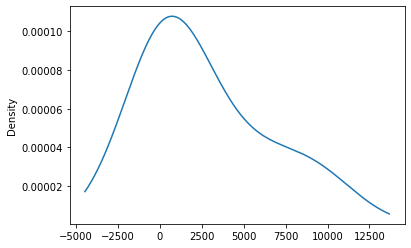

In [14]:
# Visualize the value counts of agencyCnts
agencyCnts.plot.density()

In [19]:
# groupby/left join agency
# value counts from agency

df = rawDF[['agency', 'impressions']]
df = df.groupby(by=['agency']).count()
df

,impressions
agency,
Agency 2,5100
Agency 3,9143
Agency 4,132
Agency 5,706
Agency 6,65
Agency 7,886


In [20]:
# merge 
# use concat? 
### ISSUE: other columns not showing up
merge_df2 = pd.merge(rawDF, df, on=['agency'])
merge_df2

,state,brand,spend,impressions_x,leads,link_clicks,reach,agency,impressions_y
0,CA,B2,40.27,1397,2,17,1320,Agency 2,5100
1,CA,B2,50.27,2969,8,24,2766,Agency 2,5100
2,CA,B2,63.96,3025,3,10,2818,Agency 2,5100
3,CA,B2,88.15,4732,5,38,4497,Agency 2,5100
4,CA,B2,54.42,1981,3,19,1792,Agency 2,5100
...,...,...,...,...,...,...,...,...,...
16027,CA,B2,25.04,751,0,7,690,Agency 6,65
16028,CA,B2,33.18,1200,1,8,1032,Agency 6,65
16029,CA,B2,35.91,1852,2,17,1608,Agency 6,65
16030,CA,B2,35.24,2019,1,14,1825,Agency 6,65


In [22]:
# Determine which values to replace if counts are less than ...?

bins = [0, 500, 1000, 5000, 10000]
labels =['1', '2', '3', '4']


merge_df2['Agency Tiers'] = pd.cut(merge_df2['impressions_y'], bins,labels=labels)
print (merge_df2)


      state brand  spend  impressions_x  leads  link_clicks  reach    agency  \
0        CA    B2  40.27           1397      2           17   1320  Agency 2   
1        CA    B2  50.27           2969      8           24   2766  Agency 2   
2        CA    B2  63.96           3025      3           10   2818  Agency 2   
3        CA    B2  88.15           4732      5           38   4497  Agency 2   
4        CA    B2  54.42           1981      3           19   1792  Agency 2   
...     ...   ...    ...            ...    ...          ...    ...       ...   
16027    CA    B2  25.04            751      0            7    690  Agency 6   
16028    CA    B2  33.18           1200      1            8   1032  Agency 6   
16029    CA    B2  35.91           1852      2           17   1608  Agency 6   
16030    CA    B2  35.24           2019      1           14   1825  Agency 6   
16031    CA    B2  24.83            918      0            7    834  Agency 6   

       impressions_y Agency Tiers  
0  

In [23]:
# drop impressions y
merge_df2.drop('impressions_y', axis=1, inplace=True)
merge_df2.head()

,state,brand,spend,impressions_x,leads,link_clicks,reach,agency,Agency Tiers
0,CA,B2,40.27,1397,2,17,1320,Agency 2,4
1,CA,B2,50.27,2969,8,24,2766,Agency 2,4
2,CA,B2,63.96,3025,3,10,2818,Agency 2,4
3,CA,B2,88.15,4732,5,38,4497,Agency 2,4
4,CA,B2,54.42,1981,3,19,1792,Agency 2,4


In [24]:
df3 = merge_df2.rename(columns={'impressions_x': 'Impressions'})
df3

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
0,CA,B2,40.27,1397,2,17,1320,Agency 2,4
1,CA,B2,50.27,2969,8,24,2766,Agency 2,4
2,CA,B2,63.96,3025,3,10,2818,Agency 2,4
3,CA,B2,88.15,4732,5,38,4497,Agency 2,4
4,CA,B2,54.42,1981,3,19,1792,Agency 2,4
...,...,...,...,...,...,...,...,...,...
16027,CA,B2,25.04,751,0,7,690,Agency 6,1
16028,CA,B2,33.18,1200,1,8,1032,Agency 6,1
16029,CA,B2,35.91,1852,2,17,1608,Agency 6,1
16030,CA,B2,35.24,2019,1,14,1825,Agency 6,1


In [25]:
df3.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
12987,CA,B2,17.70,752,0,8,711,Agency 3,4
7628,CA,B2,2.02,176,0,0,169,Agency 3,4
10785,CA,B2,16.77,594,1,11,569,Agency 3,4
277,CA,B2,63.72,2787,4,27,2624,Agency 2,4
10572,CA,B2,9.95,426,0,3,417,Agency 3,4
5295,CA,B2,59.60,2024,1,16,1644,Agency 7,2
6067,CA,B2,40.58,3590,3,18,3494,Agency 3,4
3165,CA,B2,24.20,802,0,5,757,Agency 2,4
9855,CA,B2,26.40,1465,0,21,1432,Agency 3,4
10867,CA,B2,1.99,256,0,0,254,Agency 3,4


In [26]:
# transform leads column from # of leads to binary, yes or no on a lead success 
# check non nulls
df3['leads'].notnull().astype('int')

0        1
1        1
2        1
3        1
4        1
        ..
16027    1
16028    1
16029    1
16030    1
16031    1
Name: leads, Length: 16032, dtype: int32

In [27]:
df3['leads'].isnull().astype('int')

0        0
1        0
2        0
3        0
4        0
        ..
16027    0
16028    0
16029    0
16030    0
16031    0
Name: leads, Length: 16032, dtype: int32

In [30]:
# change nulls == 0
df3.leads.fillna(0,inplace=True)

In [32]:
# change non nulls == 1 
df3["leads"]=df3["leads"].apply(lambda x: 1 if x!=0 else 0)

In [33]:
df3['leads'].sample(10)

3820     0
2487     1
31       1
3441     1
8055     0
9532     0
7733     0
2624     1
1428     1
12047    1
Name: leads, dtype: int64

In [34]:
df4=df3.dropna(subset=['leads'])

In [35]:
df4.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
2766,CA,B2,32.34,1424,1,8,1319,Agency 2,4
6046,CA,B2,1.97,200,0,0,198,Agency 3,4
5002,CA,B2,32.13,1910,1,13,1847,Agency 2,4
85,CA,B2,32.47,882,1,20,845,Agency 2,4
11429,CA,B2,23.81,1215,0,6,1195,Agency 3,4
1478,CA,B2,48.06,1652,1,16,1559,Agency 2,4
6211,CA,B2,1.95,228,0,0,222,Agency 3,4
3634,CA,B2,15.80,541,0,5,520,Agency 2,4
2399,CA,B2,97.55,3385,1,14,3186,Agency 2,4
12071,CA,B2,14.17,317,1,2,303,Agency 3,4


In [36]:
# export as csv
df4.to_csv('ca_df_leads.csv')

### OptBinning for leads predict on bins for state

In [37]:
# use optbinning advanced binning
from optbinning import OptimalBinning as ob

In [38]:
variable = "leads"
x = df3['spend'].values
y = df3.leads

In [39]:
optb = ob(name=variable, dtype="numerical", solver="cp")

In [40]:
optb.fit(x, y)

OptimalBinning(name='leads')

In [41]:
binning_table = optb.binning_table

In [42]:
type(binning_table)

optbinning.binning.binning_statistics.BinningTable

In [43]:
binning_table.build()
### What does it mean: 
# Bin: the intervals delimited by the optimal split points.
# Count: the number of records for each bin.
# Count (%): the percentage of records for each bin.
# Non-event: the number of non-event records (y=0) for each bin.
# Event: the number of event records (y=1) for each bin.
# Event rate: the percentage of event records for each bin.
# WoE: the Weight-of-Evidence for each bin.
# IV: the Information Value (also known as Jeffrey’s divergence) for each bin.
# JS: the Jensen-Shannon divergence for each bin.

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.04)",1434,0.089446,1430,4,0.002789,6.271311,1.384751,0.075296
1,"[2.04, 5.91)",817,0.050961,737,80,0.097919,2.612737,0.276048,0.027160
2,"[5.91, 9.11)",1490,0.092939,1053,437,0.293289,1.271641,0.149073,0.017472
3,"[9.11, 11.45)",816,0.050898,495,321,0.393382,0.825293,0.035511,0.004317
4,"[11.45, 15.44)",1103,0.068800,562,541,0.490481,0.430258,0.013080,0.001623
5,"[15.44, 21.97)",1781,0.111090,647,1134,0.636721,-0.168984,0.003114,0.000389
6,"[21.97, 24.36)",863,0.053830,296,567,0.657010,-0.257824,0.003472,0.000433
7,"[24.36, 30.38)",1033,0.064434,274,759,0.734753,-0.626698,0.023149,0.002847
8,"[30.38, 32.33)",1228,0.076597,253,975,0.793974,-0.956872,0.060056,0.007233
9,"[32.33, 45.12)",2293,0.143026,437,1856,0.809420,-1.05407,0.133208,0.015921


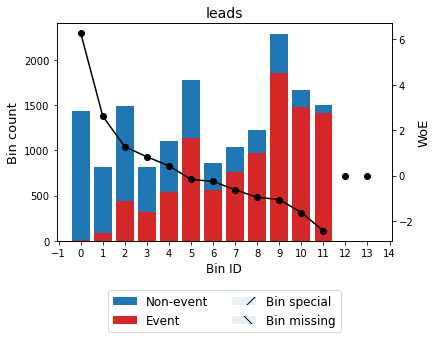

In [44]:
binning_table.plot(metric="woe")
# woe = inversely related to event rate, weight of evidence for each bin
# shows impression on y axis in thousands
# woe on right 
# bins on bottom 

### Binning check on all columns

In [45]:
# use scorecard advanced binning
# https://pypi.org/project/scorecardpy/
import scorecardpy as sc

In [46]:
bins = sc.woebin(df3, y="leads")

[INFO] creating woe binning ...


C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\scorecardpy\condition_fun.py:19: UserWarning: There are 2 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: state, brand)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


{'spend': <Figure size 432x288 with 2 Axes>,
 'link_clicks': <Figure size 432x288 with 2 Axes>,
 'agency': <Figure size 432x288 with 2 Axes>,
 'reach': <Figure size 432x288 with 2 Axes>,
 'Agency Tiers': <Figure size 432x288 with 2 Axes>,
 'Impressions': <Figure size 432x288 with 2 Axes>}

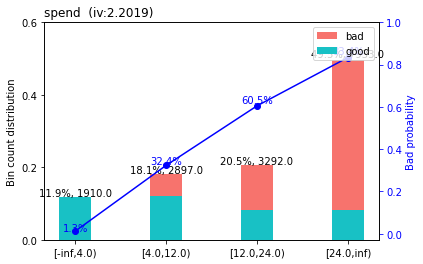

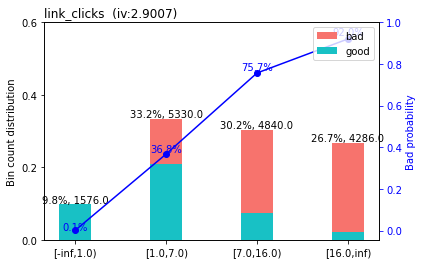

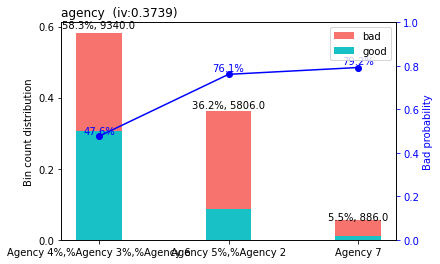

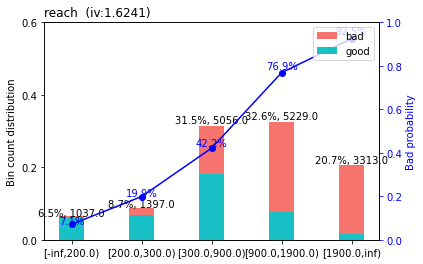

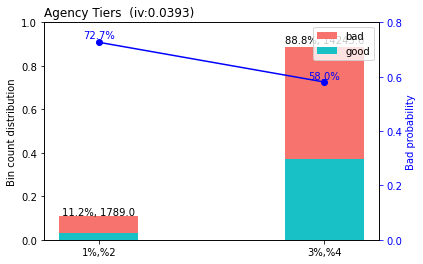

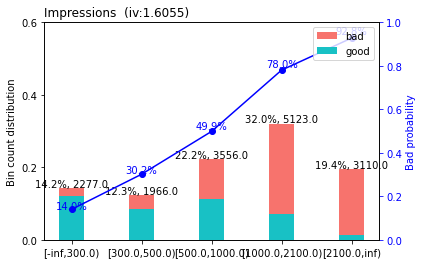

In [47]:
# plot the bins
sc.woebin_plot(bins)
# need to reformat to read plots easily

### quick observation---Plots with highest IV value = most likley to predict successfully on leads
# state (.05), agency (.03), spend (.002) seem most promising

### Drop for split

In [48]:
df4.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
10647,CA,B2,1.99,328,0,0,315,Agency 3,4
2077,CA,B2,63.53,2622,1,21,2511,Agency 2,4
1131,CA,B2,65.38,3310,0,26,3104,Agency 2,4
6814,CA,B2,44.55,2452,1,29,2383,Agency 3,4
12151,CA,B2,12.56,641,1,22,605,Agency 3,4
15308,CA,B2,31.65,1603,1,22,1518,Agency 5,2
2970,CA,B2,4.28,237,0,0,224,Agency 2,4
3137,CA,B2,25.03,1386,0,13,1297,Agency 2,4
8490,CA,B2,30.80,1686,1,4,1638,Agency 3,4
952,CA,B2,16.54,628,0,2,594,Agency 2,4


In [49]:
# check current df and keep only: 
# state tiers, agency tiers, spend, Impressions, brand
# target = leads
model_df1 = df4.drop(columns=['agency', 'state', 'brand'])

In [50]:
model_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16032 entries, 0 to 16031
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   spend         16032 non-null  float64 
 1   Impressions   16032 non-null  int64   
 2   leads         16032 non-null  int64   
 3   link_clicks   16032 non-null  int64   
 4   reach         16032 non-null  int64   
 5   Agency Tiers  16032 non-null  category
dtypes: category(1), float64(1), int64(4)
memory usage: 767.4 KB


### Encoding

In [52]:
# generagte cat variables
# Generate our categorical variable lists
application_cat = model_df1.dtypes[model_df1.dtypes == "object"].index.tolist()

In [53]:
# one hot encoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# create new df before merging later
encoded_df = pd.DataFrame(enc.fit_transform(model_df1[application_cat]))

# Add the encoded variable names to the dataframe
encoded_df.columns = enc.get_feature_names(application_cat)
encoded_df.head()

""
0
1
2
3
4


In [54]:
# merge dfs
model_df1_official = model_df1.merge(encoded_df, left_index=True, right_index=True)
model_df1_official = model_df1.drop(application_cat, 1)
model_df1_official.head()

C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,spend,Impressions,leads,link_clicks,reach,Agency Tiers
0,40.27,1397,1,17,1320,4
1,50.27,2969,1,24,2766,4
2,63.96,3025,1,10,2818,4
3,88.15,4732,1,38,4497,4
4,54.42,1981,1,19,1792,4


In [56]:
model_df1_official.to_csv('ca_b2_df.csv')

# Split into train and test features (delete later)

In [ ]:
# # Split our preprocessed data into our features and target arrays
# y = model_df1_official['leads'].values
# X = model_df1_official.drop(['leads'], 1).values

# # Split the preprocessed data into a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# # Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

# Compile, Train, Evaluate our Model 1 - NN (Delete later)

In [ ]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# # using multi-layer perceptron (two layers)
# numInputFeatures = len(X_train[0])

# # I have 19k columns
# # layer1 = input layer, typically equals number of input variables in data
# layer1 = 20
# # layer 2 = hidden layer, typically 2/3 of input layer
# layer2 = 10
# # layer 3 = hidden layer
# layer3= 5

# nn = tf.keras.models.Sequential()

# # First hidden layer
# nn.add(
#     tf.keras.layers.Dense(units=layer1, 
#                           input_dim=numInputFeatures, 
#                           activation="relu")
# )
# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=layer2, 
#                              activation="relu"))

# # adding a third layer to increase accuracy 
# nn.add(tf.keras.layers.Dense(units=layer3, 
#                              activation='relu'))


# # Output layer
# nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
# nn.summary()

In [ ]:
# # Compile the model
# nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# # Create a callback that saves the model's weights every epoch
# cp_callback = ModelCheckpoint(
#     # checkpoint directory and file structure defined above
#     filepath=checkpoint_path,
#     # notified when checkpoint is being saved to the directory
#     verbose=1,
#     # checkpoint files take small space
#     save_weights_only=True,
#     # checkpoints saved every epoch
#     save_freq='epoch')

In [ ]:
# # Train the model
# # Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

In [ ]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# # Export the model to HDF5 file
#nn.save("AlphabetSoupCharity_optimization.h5")